# Random Forest on Mushroom Dataset

[Dataset](https://github.com/heenalsapovadia/ml_practices_2018/blob/master/Labs/Lab1/Heenal/Data/mushroom_new.csv)

[EDA on dataset](https://github.com/heenalsapovadia/ml_practices_2018/blob/master/Labs/Lab1/Heenal/PythonNotebooks/Mushroom.ipynb)

In [1]:
# Importing the necessary libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [2]:
# Loading the data
mush = pd.read_csv('../../Lab1/Heenal/Data/mushroom_new.csv')

In [3]:
mush.shape

(8124, 23)

In [4]:
mush

class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
5         0          5            3          9        1     0   
6         0          0            2          8        1     0   
7         0          0            3          8        1     3   
8         1          5            3          8        1     6   
9         0          0            2          9        1     0   
10        0          5            3          9        1     3   
11        0          5            3          9        1     0   
12        0          0            2          9        1     0   
13        1          5            3          8        1     6   
14        0          5            0          4        0     5   
15        0          4            0          3        0     5   
16        0          2            0          8        0     5   
17        1          5            2          4        1     6   
18        1          5            3          8        1     6   
19        1          5            2          4        1     6   
20        0          0            2          9        1     0   
21        1          5            3          4        1     6   
22        0          0            3          9        1     3   
23        0          0            3          8        1     0   
24        0          0            2          8        1     3   
25        1          2            2          8        1     6   
26        0          5            3          9        1     0   
27        0          5            3          8        1     3   
28        0          2            0          4        0     5   
29        0          5            2          9        1     0   
...     ...        ...          ...        ...      ...   ...   
8094      0          0            2          3        0     5   
8095      1          5            3          1        0     4   
8096      0          3            0          8        0     5   
8097      1          3            3          4        0     7   
8098      1          3            2          2        0     8   
8099      0          3            0          8        0     5   
8100      0          2            2          4        0     5   
8101      1          3            2          2        0     7   
8102      0          5            2          4        0     5   
8103      0          3            2          4        0     5   
8104      0          3            2          4        0     5   
8105      0          3            2          4        0     5   
8106      0          3            2          4        0     5   
8107      0          5            2          4        0     5   
8108      1          3            3          2        0     8   
8109      0          0            2          8        0     5   
8110      0          5            2          4        0     5   
8111      0          3            2          8        0     5   
8112      0          3            2          4        0     5   
8113      1          3            3          2        0     8   
8114      1          2            3          1        0     4   
8115      0          5            2          4        0     5   
8116      1          3            3          4        0     7   
8117      1          3            2          2        0     8   
8118      1          3            3          4        0     2   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2      

In [5]:
# Separating the data and the target variable
X = mush.drop('class', axis=1)
y = mush['class']

In [6]:
X.shape, y.shape

(8124, 22)

In [10]:
mush['class'].unique()

array([1, 0])

In [11]:
y.unique()

array([1, 0])

In [12]:
# Splitting the data into TRAIN and TEST sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
# modelling 
model = RandomForestClassifier(n_estimators=10, bootstrap=True)

In [14]:
model.get_params

<bound method RandomForestClassifier.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

In [15]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
# Extract individual trees
estimator5 = model.estimators_[5]
estimator2 = model.estimators_[2]
estimator8 = model.estimators_[8]
estimator9 = model.estimators_[9]

In [17]:
# To export the tree and plot it
export_graphviz(estimator5, out_file='random5.dot', 
                feature_names = X.columns,
                class_names = ['0','1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)


In [77]:
export_graphviz(estimator2, out_file='random2.dot', 
                feature_names = X.columns,
                class_names = ['0','1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)


In [78]:
export_graphviz(estimator8, out_file='random8.dot', 
                feature_names = X.columns,
                class_names = ['0','1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)


In [79]:
export_graphviz(estimator9, out_file='random9.dot', 
                feature_names = X.columns,
                class_names = ['0','1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)


In [81]:
from subprocess import call
call(['dot', '-Tpng', 'random5.dot', '-o', 'random5.png', '-Gdpi=600'])
call(['dot', '-Tpng', 'random2.dot', '-o', 'random2.png', '-Gdpi=600'])
call(['dot', '-Tpng', 'random8.dot', '-o', 'random8.png', '-Gdpi=600'])
call(['dot', '-Tpng', 'random9.dot', '-o', 'random9.png', '-Gdpi=600'])


0

In [82]:
# to convert the plot of tree into image file
from IPython.display import Image
Image(filename = 'random5.png')

In [18]:
# Predicting
train_rf_predictions = model.predict(X_train)
train_rf_probs = model.predict_proba(X_train)[:, 1]

In [19]:
rf_predictions = model.predict(X_test)
rf_probs = model.predict_proba(X_test)[:, 1]

In [20]:
# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

In [22]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, 
                                     [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, 
                                      [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    #for metric in ['recall', 'precision', 'roc']:
     #   print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();


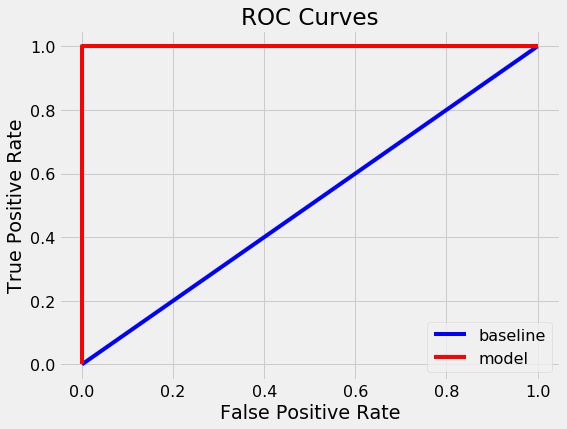

<Figure size 432x288 with 0 Axes>

In [23]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)
plt.savefig('roc_auc_curve.png')


In [48]:
model.score(X_test,y_test)

1.0

## Tried Decision tree implementation to find out the accuracy

In [52]:
tree = DecisionTreeClassifier(random_state=50)

In [53]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=50,
            splitter='best')

In [55]:
tree.score(X_test, y_test)

1.0

In [68]:
export_graphviz(tree, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = ['0','1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)


In [69]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])


0

In [70]:
from IPython.display import Image
Image(filename = 'tree.png')